In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt
import mpl_scatter_density

# Comparing catalogue (vG+2023)

In [3]:
df_vg =  pd.read_csv('Catalogues/NGC2539_vG2023+GaiaDR3.csv')
df_vg

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
0,5725183060454307840,122.543457,-13.441126,0.5316,-2.749,-0.215,19.453873,19.289522,18.325554,NGC_2539,...,NaN,NaN,NaN,NaN,122.543469,-13.441125,5.009369,3.603222,0.0699,0.0
1,5725182953073887360,122.514357,-13.457342,0.6788,-2.414,0.028,18.965633,19.964792,17.986687,NGC_2539,...,0.0486,0.0150,0.1002,PHOENIX,122.514368,-13.457342,3.510630,2.398008,0.0564,0.0
2,5725180723992144256,122.446022,-13.534858,0.7080,-2.336,-0.247,18.992800,19.908337,18.105816,NGC_2539,...,0.0138,0.0043,0.0281,MARCS,122.446032,-13.534857,3.623407,2.351267,0.0357,0.0
3,5725178696767530112,122.620965,-13.510299,0.6625,-2.193,-0.258,18.503292,19.363157,17.563908,NGC_2539,...,0.2539,0.2363,0.2768,MARCS,122.620975,-13.510297,2.765433,1.990795,0.0404,0.0
4,5725178314509097728,122.539048,-13.547586,0.7476,-1.777,-0.625,18.062864,18.826242,17.112633,NGC_2539,...,0.1028,0.0777,0.1289,PHOENIX,122.539056,-13.547583,1.923987,1.365186,0.0493,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,5725970276418851328,122.103406,-13.064577,0.7605,-2.301,-0.531,13.934523,14.170032,13.552169,NGC_2539,...,0.0923,0.0878,0.0962,A,122.103416,-13.064574,0.297504,0.191861,0.0588,0.0
1135,5725112794788207744,122.846499,-13.754821,0.7201,-1.988,-0.638,17.717495,18.519274,16.835249,NGC_2539,...,0.2831,0.2700,0.2987,PHOENIX,122.846508,-13.754818,1.612267,1.417754,0.0109,0.0
1136,5725107980125916416,122.916747,-13.856385,0.6776,-2.218,-0.192,15.150477,15.475309,14.663897,NGC_2539,...,0.0460,0.0417,0.0515,MARCS,122.916757,-13.856384,0.470797,0.366977,-0.0176,0.0
1137,5725191165050219392,122.131967,-13.494460,0.3708,-2.558,-0.637,19.609621,20.761806,18.539328,NGC_2539,...,NaN,NaN,NaN,NaN,122.131979,-13.494457,5.168311,4.066477,-0.1379,0.0


In [4]:
jj, = np.where(df_vg.Pmemb >= 0.7)
dfvg = df_vg.iloc[jj]

In [5]:
dfvg

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
11,5725169724574250368,122.436369,-13.687641,0.7825,-2.457,-0.398,17.591800,18.290110,16.808563,NGC_2539,...,0.1052,0.0894,0.1184,MARCS,122.436381,-13.687639,1.402404,1.034618,0.0442,0.0
13,5725168079608466304,122.443245,-13.765486,0.7389,-2.559,-0.370,14.012406,14.255021,13.619826,NGC_2539,...,0.1246,0.1218,0.1275,MARCS,122.443256,-13.765484,0.274634,0.186572,0.0871,0.0
21,5725195086362592896,122.480864,-13.408580,0.7372,-2.286,-0.556,13.472965,13.666136,13.149684,NGC_2539,...,0.0885,0.0840,0.0940,MARCS,122.480874,-13.408578,0.212803,0.163630,0.0082,0.0
22,5725107915705369984,122.876573,-13.863225,0.8040,-2.290,-0.747,15.763227,16.162367,15.196784,NGC_2539,...,0.0146,0.0060,0.0236,MARCS,122.876584,-13.863222,0.654409,0.478973,-0.0070,0.0
29,5724918868422661120,123.007680,-13.927760,0.8103,-2.426,-0.595,15.580099,15.963792,15.036696,NGC_2539,...,0.0647,0.0564,0.0725,MARCS,123.007691,-13.927758,0.529302,0.490049,-0.1401,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,5725969932821520640,122.008902,-13.098581,0.8245,-2.080,-0.492,17.025606,17.619530,16.305689,NGC_2539,...,0.0362,0.0095,0.0598,PHOENIX,122.008911,-13.098578,1.357902,0.901828,-0.1079,0.0
1123,5725956017127403648,122.250761,-13.170479,0.7394,-2.347,-0.421,14.926690,15.240170,14.442820,NGC_2539,...,0.0476,0.0362,0.0593,MARCS,122.250772,-13.170477,0.426359,0.282829,0.0948,0.0
1128,5725951241123812224,122.222086,-13.293557,0.8289,-2.344,-0.535,17.370806,18.019985,16.611818,NGC_2539,...,0.0586,0.0471,0.0704,PHOENIX,122.222096,-13.293555,1.356928,0.943008,0.0388,0.0
1131,5726426088409609600,123.504827,-13.744042,0.8378,-2.243,-0.433,17.197863,17.890827,16.414024,NGC_2539,...,0.1149,0.0969,0.1387,PHOENIX,123.504837,-13.744040,1.332593,1.539109,-0.2364,0.0


# 5 Populations

In [7]:
p1 = pd.read_csv('Catalogues/pop1_NGC2539_GMM3.csv')
p2 = pd.read_csv('Catalogues/pop2_NGC2539_GMM3.csv')
p3 = pd.read_csv('Catalogues/pop3_NGC2539_GMM3.csv')
p4 = pd.read_csv('Catalogues/pop4_NGC2539_GMM3.csv')
p5 = pd.read_csv('Catalogues/pop5_NGC2539_GMM3.csv')

## Computing Completeness and Purity

### Population 1

In [8]:
ra1 = p1.RAJ2000
dec1 = p1.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [9]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [10]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [11]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [12]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [13]:
p1.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
494,121.589293,-13.093309,-2.201,-0.411,12.731518,0.378699,0.7773,0
906,121.568572,-12.644397,-2.301,-0.411,16.337315,1.159345,0.7057,0
1327,122.034538,-12.683238,-2.225,-0.304,15.412107,1.009403,0.7361,0
1402,121.936630,-12.556276,-1.956,-0.347,13.159049,0.446623,0.6987,0
1416,121.910056,-12.451314,-2.317,-0.518,16.496590,1.065621,0.7763,0
1422,121.986930,-12.414451,-2.289,-0.518,15.343348,0.847955,0.7293,0
1545,121.959984,-12.327115,-2.610,-0.541,12.454536,0.327003,0.8121,0
1550,121.908635,-12.295745,-2.297,-0.653,15.023970,0.801169,0.7153,0
1582,121.553500,-12.334414,-2.235,-0.591,14.431812,0.689578,0.7795,0
1687,121.987003,-12.075527,-2.378,-0.808,14.231053,0.677933,0.7857,0


In [14]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
108,5726015528195574144,121.589283,-13.093311,0.7773,-2.201,-0.411,12.731518,12.869332,12.490633,NGC_2539,...,0.1277,0.1254,0.1298,A,121.589293,-13.093309,0.240146,0.178551,0.1474,0.0
175,5726233197136458112,121.568561,-12.644399,0.7057,-2.301,-0.411,16.337315,16.830915,15.671571,NGC_2539,...,0.2109,0.1945,0.2333,MARCS,121.568572,-12.644397,0.675254,0.539988,-0.0818,0.0
549,5727530861375402112,122.034528,-12.683239,0.7361,-2.225,-0.304,15.412107,15.830646,14.821242,NGC_2539,...,0.0184,0.0055,0.0249,PHOENIX,122.034538,-12.683238,0.530224,0.323505,0.1587,0.0
517,5727550996182095360,121.936621,-12.556277,0.6987,-1.956,-0.347,13.159049,13.323388,12.876765,NGC_2539,...,0.1373,0.1341,0.1427,MARCS,121.936630,-12.556276,0.204810,0.140865,0.0247,0.0
553,5727555737825410176,121.910046,-12.451316,0.7763,-2.317,-0.518,16.496590,16.955202,15.889581,NGC_2539,...,0.0025,0.0006,0.0067,PHOENIX,121.910056,-12.451314,0.763875,0.529370,0.0819,0.0
585,5727556699898070144,121.986920,-12.414453,0.7293,-2.289,-0.518,15.343348,15.686052,14.838098,NGC_2539,...,0.0538,0.0444,0.0584,MARCS,121.986930,-12.414451,0.426769,0.283351,0.0607,0.0
93,5727746052116095360,121.959972,-12.327117,0.8121,-2.610,-0.541,12.454536,12.572279,12.245276,NGC_2539,...,0.1414,0.1377,0.1505,A,121.959984,-12.327115,0.209469,0.130046,0.1436,0.0
89,5727747052849211136,121.908624,-12.295748,0.7153,-2.297,-0.653,15.023970,15.344985,14.543816,NGC_2539,...,0.0693,0.0601,0.0772,MARCS,121.908635,-12.295745,0.420460,0.258704,0.1416,0.0
1086,5727754611991842304,121.553490,-12.334417,0.7795,-2.235,-0.591,14.431812,14.695847,14.006269,NGC_2539,...,0.0402,0.0325,0.0504,MARCS,121.553500,-12.334414,0.342254,0.263938,-0.1655,0.0
403,5727777839175515520,121.986992,-12.075530,0.7857,-2.378,-0.808,14.231053,14.491918,13.813985,NGC_2539,...,0.0546,0.0497,0.0588,MARCS,121.987003,-12.075527,0.310541,0.183848,0.0440,0.0


(121.2, 124.5)

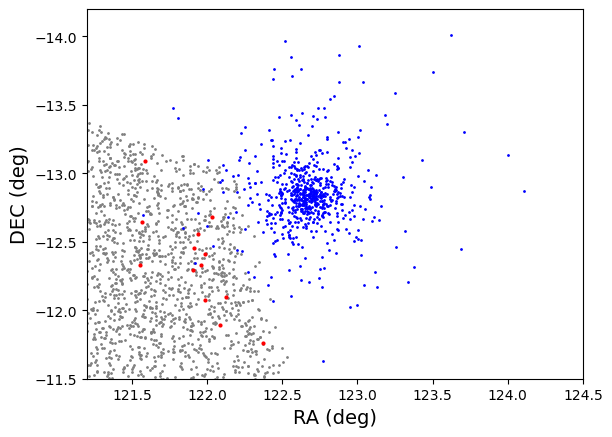

In [15]:
fig, ax = plt.subplots()

ax.scatter(p1.RAJ2000, p1.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p1.iloc[matched_idx_catalog1].RAJ2000, p1.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [16]:
dfvg_t = len(dfvg)
p1_t = len(p1.iloc[matched_idx_catalog1])

Completeness


In [17]:
p1_c = p1_t /dfvg_t
p1_c*100

1.984732824427481

Pureness

In [18]:
p1_p = p1_t/len(p1)
p1_p*100

0.5214600882470918

### Population 2

In [19]:
ra1 = p2.RAJ2000
dec1 = p2.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [20]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [21]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [22]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [23]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [24]:
p2

,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
0,120.836705,-12.094696,-1.244,-1.837,18.386425,1.442709,0.5912,1
1,120.821970,-12.089708,-3.211,-2.017,20.124277,1.666735,0.8475,1
2,120.835819,-12.034627,-0.763,-1.769,16.235035,1.042976,0.6337,1
3,120.966764,-11.983713,-2.259,-0.310,20.102997,2.181265,0.7669,1
4,120.904819,-11.989479,-2.238,-2.179,17.254555,1.449751,0.7753,1
...,...,...,...,...,...,...,...,...
3422,122.466512,-10.909321,-0.711,-1.942,18.656942,1.174423,0.6601,1
3423,122.477726,-10.872498,-0.438,-1.246,18.571693,1.751053,0.7159,1
3424,122.595642,-10.841699,-3.663,-1.182,19.428995,1.395157,0.6737,1
3425,122.605066,-10.840505,-0.521,-1.487,19.432290,1.203903,0.5995,1


In [25]:
p2.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
649,122.252842,-13.341823,-2.476,-0.746,16.382830,1.112154,0.8430,1
890,122.008911,-13.098578,-2.080,-0.492,17.025606,1.313841,0.8245,1
1019,121.572847,-12.695077,-2.288,-0.530,17.874983,1.715794,0.7872,1
1409,123.504837,-13.744040,-2.243,-0.433,17.197863,1.476803,0.8378,1
1633,123.037806,-13.666592,-2.431,-0.538,17.460289,1.205940,0.7689,1
1759,122.871253,-13.299649,-2.222,-0.663,17.678974,1.484718,0.8412,1
1772,122.921408,-13.185990,-2.260,-0.563,17.271206,1.484058,0.6139,1
1818,123.010930,-13.149315,-2.274,-0.999,16.294966,1.040947,0.7804,1
1863,122.834949,-12.848214,-2.414,-0.861,18.361378,1.757855,0.8572,1
1875,123.083194,-12.811882,-2.050,-0.870,14.426980,0.696197,0.7698,1


In [26]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
38,5725198762854646272,122.252831,-13.341826,0.8430,-2.476,-0.746,16.382830,16.864662,15.752508,NGC_2539,...,0.0459,0.0366,0.0570,MARCS,122.252842,-13.341823,0.778311,0.578693,-0.0838,0.0
1114,5725969932821520640,122.008902,-13.098581,0.8245,-2.080,-0.492,17.025606,17.619530,16.305689,NGC_2539,...,0.0362,0.0095,0.0598,PHOENIX,122.008911,-13.098578,1.357902,0.901828,-0.1079,0.0
105,5726044733973511808,121.572837,-12.695079,0.7872,-2.288,-0.530,17.874983,18.706310,16.990517,NGC_2539,...,0.2722,0.2605,0.2809,PHOENIX,121.572847,-12.695077,1.634826,1.215855,0.0254,0.0
1131,5726426088409609600,123.504827,-13.744042,0.8378,-2.243,-0.433,17.197863,17.890827,16.414024,NGC_2539,...,0.1149,0.0969,0.1387,PHOENIX,123.504837,-13.744040,1.332593,1.539109,-0.2364,0.0
138,5726615311784761856,123.037795,-13.666595,0.7689,-2.431,-0.538,17.460289,17.981009,16.775068,NGC_2539,...,0.0151,0.0040,0.0340,PHOENIX,123.037806,-13.666592,1.491153,1.977398,-0.2875,0.0
83,5726689322660960000,122.871243,-13.299652,0.8412,-2.222,-0.663,17.678974,18.375671,16.890953,NGC_2539,...,0.0017,0.0004,0.0051,PHOENIX,122.871253,-13.299649,1.698977,1.777948,-0.2373,0.0
460,5726694747202461312,122.921398,-13.185993,0.6139,-2.260,-0.563,17.271206,17.964739,16.480680,NGC_2539,...,0.0242,0.0081,0.0464,PHOENIX,122.921408,-13.185990,1.347161,1.574631,-0.2840,0.0
378,5726715500484524800,123.010919,-13.149319,0.7804,-2.274,-0.999,16.294966,16.736706,15.695759,NGC_2539,...,0.0297,0.0189,0.0394,MARCS,123.010930,-13.149315,0.856211,1.030142,-0.3333,0.0
838,5726739694033822336,122.834938,-12.848217,0.8572,-2.414,-0.861,18.361378,19.205093,17.447239,NGC_2539,...,0.0198,0.0043,0.0531,PHOENIX,122.834949,-12.848214,2.817031,2.937500,-0.2299,0.0
798,5726743714126200576,123.083184,-12.811886,0.7698,-2.050,-0.870,14.426980,14.696369,14.000173,NGC_2539,...,0.0745,0.0683,0.0799,MARCS,123.083194,-12.811882,0.397399,0.320346,-0.3250,0.0


(121.2, 124.5)

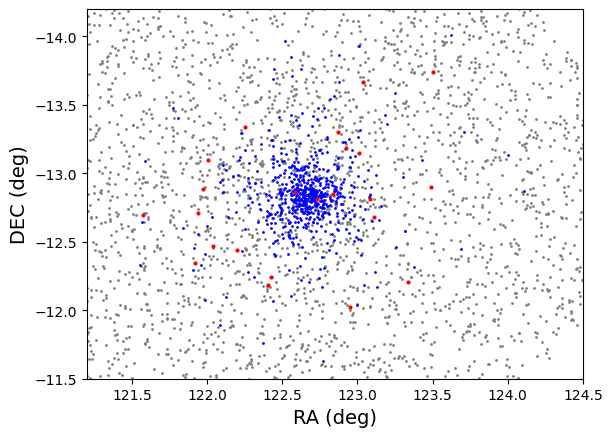

In [27]:
fig, ax = plt.subplots()

ax.scatter(p2.RAJ2000, p2.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p2.iloc[matched_idx_catalog1].RAJ2000, p2.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [28]:
dfvg_t = len(dfvg)
p2_t = len(p2.iloc[matched_idx_catalog1])

Completeness


In [29]:
p2_c = p2_t /dfvg_t
p2_c*100

3.5114503816793894

Pureness

In [30]:
p2_p = p2_t/len(p2)
p2_p*100

0.6711409395973155

### Population 3

In [31]:
ra1 = p3.RAJ2000
dec1 = p3.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [32]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [33]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [34]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [35]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [36]:
p3.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
0,122.480874,-13.408578,-2.286,-0.556,13.472965,0.516452,0.7372,2
1,122.414207,-13.314847,-2.311,-0.600,13.363639,0.609845,0.7725,2
2,122.222096,-13.293555,-2.344,-0.535,17.370806,1.408167,0.8289,2
3,122.250772,-13.170477,-2.347,-0.421,14.926690,0.797351,0.7394,2
4,122.103416,-13.064574,-2.301,-0.531,13.934523,0.617864,0.7605,2
...,...,...,...,...,...,...,...,...
577,122.774611,-12.305778,-2.374,-0.748,14.581053,0.750966,0.7523,2
578,122.749552,-12.298490,-2.276,-0.582,16.656437,1.181709,0.7921,2
579,122.746991,-12.238201,-2.327,-0.620,16.202570,1.042841,0.7213,2
580,122.678540,-12.205106,-2.376,-0.585,15.679736,0.965592,0.7160,2


In [37]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
21,5725195086362592896,122.480864,-13.408580,0.7372,-2.286,-0.556,13.472965,13.666136,13.149684,NGC_2539,...,0.0885,0.0840,0.0940,MARCS,122.480874,-13.408578,0.212803,0.163630,0.0082,0.0
37,5725199621848057984,122.414196,-13.314850,0.7725,-2.311,-0.600,13.363639,13.594479,12.984633,NGC_2539,...,0.0928,0.0886,0.0965,MARCS,122.414207,-13.314847,0.196913,0.149006,-0.0456,0.0
1128,5725951241123812224,122.222086,-13.293557,0.8289,-2.344,-0.535,17.370806,18.019985,16.611818,NGC_2539,...,0.0586,0.0471,0.0704,PHOENIX,122.222096,-13.293555,1.356928,0.943008,0.0388,0.0
1123,5725956017127403648,122.250761,-13.170479,0.7394,-2.347,-0.421,14.926690,15.240170,14.442820,NGC_2539,...,0.0476,0.0362,0.0593,MARCS,122.250772,-13.170477,0.426359,0.282829,0.0948,0.0
1134,5725970276418851328,122.103406,-13.064577,0.7605,-2.301,-0.531,13.934523,14.170032,13.552169,NGC_2539,...,0.0923,0.0878,0.0962,A,122.103416,-13.064574,0.297504,0.191861,0.0588,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,5727617271816364032,122.774600,-12.305781,0.7523,-2.374,-0.748,14.581053,14.875655,14.124689,NGC_2539,...,0.0562,0.0496,0.0621,MARCS,122.774611,-12.305778,0.383507,0.391985,-0.2924,0.0
575,5727617550992630528,122.749541,-12.298492,0.7921,-2.276,-0.582,16.656437,17.172783,15.991074,NGC_2539,...,0.0089,0.0032,0.0170,PHOENIX,122.749552,-12.298490,1.051386,1.218200,-0.5263,0.0
112,5727664933071818624,122.746981,-12.238204,0.7213,-2.327,-0.620,16.202570,16.640747,15.597906,NGC_2539,...,0.0109,0.0037,0.0211,PHOENIX,122.746991,-12.238201,0.751058,0.837895,-0.2290,0.0
109,5727665959566833280,122.678529,-12.205109,0.7160,-2.376,-0.585,15.679736,16.076110,15.110518,NGC_2539,...,0.0159,0.0061,0.0257,MARCS,122.678540,-12.205106,0.620051,0.681908,-0.2811,0.0


(121.2, 124.5)

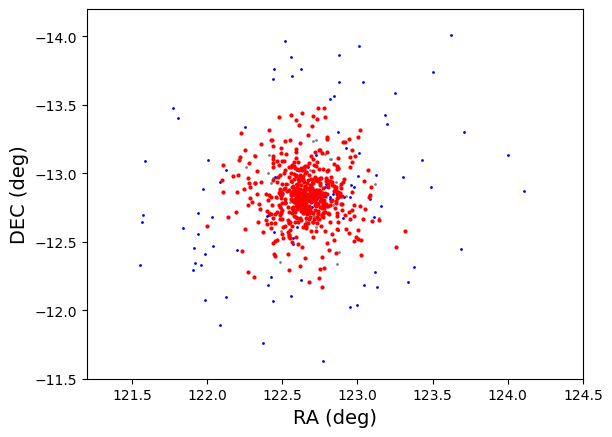

In [38]:
fig, ax = plt.subplots()

ax.scatter(p3.RAJ2000, p3.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p3.iloc[matched_idx_catalog1].RAJ2000, p3.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [39]:
dfvg_t = len(dfvg)
p3_t = len(p3.iloc[matched_idx_catalog1])

Completeness


In [40]:
p3_c = p3_t /dfvg_t
p3_c*100

81.83206106870229

Pureness

In [41]:
p3_p = p3_t/len(p3)
p3_p*100

92.09621993127148

### Population 4

In [42]:
ra1 = p4.RAJ2000
dec1 = p4.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [43]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [44]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [45]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [46]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [47]:
p4.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
587,123.007691,-13.927758,-2.426,-0.595,15.580099,0.927096,0.8103,3
1184,122.876584,-13.863222,-2.290,-0.747,15.763227,0.965583,0.8040,3
1212,122.516385,-13.965905,-2.239,-0.433,17.050293,1.205120,0.7145,3
1235,122.556166,-13.847287,-2.152,-0.728,15.925107,0.902498,0.7071,3
1272,122.623236,-13.760112,-2.357,-0.526,17.152250,1.338465,0.7557,3
1279,122.565709,-13.713057,-2.385,-0.689,16.258614,1.038034,0.7444,3
1482,122.443256,-13.765484,-2.559,-0.370,14.012406,0.635195,0.7389,3
1490,122.436381,-13.687639,-2.457,-0.398,17.591800,1.481546,0.7825,3
1975,121.773480,-13.476245,-2.319,-0.410,16.195013,1.040184,0.7004,3
2039,121.805420,-13.405955,-2.106,-0.381,15.765438,0.843130,0.7624,3


In [48]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
29,5724918868422661120,123.007680,-13.927760,0.8103,-2.426,-0.595,15.580099,15.963792,15.036696,NGC_2539,...,0.0647,0.0564,0.0725,MARCS,123.007691,-13.927758,0.529302,0.490049,-0.1401,0.0
22,5725107915705369984,122.876573,-13.863225,0.8040,-2.290,-0.747,15.763227,16.162367,15.196784,NGC_2539,...,0.0146,0.0060,0.0236,MARCS,122.876584,-13.863222,0.654409,0.478973,-0.0070,0.0
1110,5725113481983114240,122.516375,-13.965907,0.7145,-2.239,-0.433,17.050293,17.589607,16.384487,NGC_2539,...,0.0589,0.0447,0.0840,PHOENIX,122.516385,-13.965905,1.108167,0.739725,0.0169,0.0
1106,5725116849237274752,122.556156,-13.847291,0.7071,-2.152,-0.728,15.925107,16.289055,15.386557,NGC_2539,...,0.0440,0.0328,0.0539,MARCS,122.556166,-13.847287,0.565617,0.409262,-0.0797,0.0
1100,5725126401244507904,122.623225,-13.760115,0.7557,-2.357,-0.526,17.152250,17.761162,16.422697,NGC_2539,...,0.0744,0.0603,0.0851,PHOENIX,122.623236,-13.760112,1.097271,0.788785,-0.0369,0.0
1099,5725127462097961728,122.565698,-13.713060,0.7444,-2.385,-0.689,16.258614,16.699545,15.661510,NGC_2539,...,0.0113,0.0044,0.0185,PHOENIX,122.565709,-13.713057,0.726035,0.496656,-0.0433,0.0
13,5725168079608466304,122.443245,-13.765486,0.7389,-2.559,-0.370,14.012406,14.255021,13.619826,NGC_2539,...,0.1246,0.1218,0.1275,MARCS,122.443256,-13.765484,0.274634,0.186572,0.0871,0.0
11,5725169724574250368,122.436369,-13.687641,0.7825,-2.457,-0.398,17.591800,18.290110,16.808563,NGC_2539,...,0.1052,0.0894,0.1184,MARCS,122.436381,-13.687639,1.402404,1.034618,0.0442,0.0
1091,5725921623028823552,121.773469,-13.476246,0.7004,-2.319,-0.410,16.195013,16.635645,15.595461,NGC_2539,...,0.0365,0.0272,0.0504,PHOENIX,121.773480,-13.476245,0.658204,0.481726,0.0767,0.0
1111,5725934026894338688,121.805411,-13.405957,0.7624,-2.106,-0.381,15.765438,16.103230,15.260099,NGC_2539,...,0.0561,0.0461,0.0645,PHOENIX,121.805420,-13.405955,0.555073,0.384051,0.0846,0.0


(121.2, 124.5)

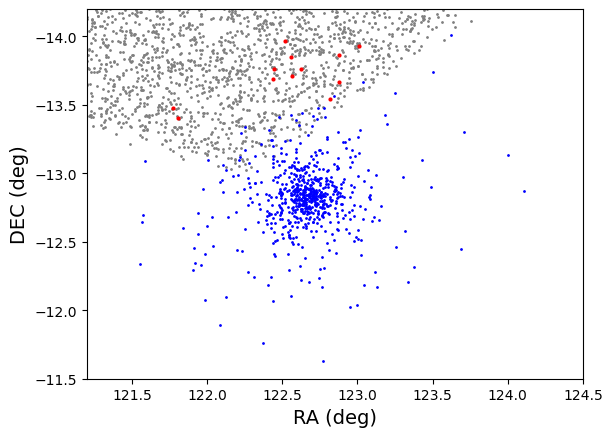

In [49]:
fig, ax = plt.subplots()

ax.scatter(p4.RAJ2000, p4.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p4.iloc[matched_idx_catalog1].RAJ2000, p4.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [50]:
dfvg_t = len(dfvg)
p4_t = len(p4.iloc[matched_idx_catalog1])

Completeness


In [51]:
p4_c = p4_t /dfvg_t
p4_c*100

1.8320610687022902

Pureness

In [52]:
p4_p = p4_t/len(p4)
p4_p*100

0.4977187888842804

### Population 5

In [53]:
ra1 = p5.RAJ2000
dec1 = p5.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [54]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [55]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [56]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [57]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [58]:
p5.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
73,123.621688,-14.010179,-2.411,-0.372,14.458142,0.705700,0.7870,4
360,123.708779,-13.305395,-2.255,-0.542,15.023931,0.814781,0.7145,4
569,124.003075,-13.136115,-2.335,-0.494,15.850763,0.962978,0.7899,4
701,123.252097,-13.586993,-2.338,-0.238,12.331991,0.304743,0.6999,4
734,123.185856,-13.427786,-1.986,-0.595,12.940250,0.482623,0.7488,4
806,123.198750,-13.358569,-2.266,-0.145,14.299912,0.671442,0.7143,4
857,123.431666,-13.095293,-2.427,-0.443,15.969254,1.027783,0.7861,4
983,123.005507,-12.979301,-2.719,-0.319,13.510445,0.636224,0.7587,4
994,123.305812,-12.974520,-2.125,-0.474,16.040089,0.958479,0.6588,4
1004,123.123719,-12.990305,-2.069,-0.199,14.193339,0.647512,0.7158,4


In [59]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
416,5726359228653686272,123.621677,-14.010180,0.7870,-2.411,-0.372,14.458142,14.732329,14.026629,NGC_2539,...,0.0645,0.0583,0.0715,MARCS,123.621688,-14.010179,0.366549,0.413702,-0.2867,0.0
116,5726467015152440448,123.708769,-13.305398,0.7145,-2.255,-0.542,15.023931,15.347285,14.532504,NGC_2539,...,0.0684,0.0642,0.0735,MARCS,123.708779,-13.305395,0.435173,0.405145,-0.2130,0.0
122,5726569132294876160,124.003064,-13.136117,0.7899,-2.335,-0.494,15.850763,16.226065,15.263086,NGC_2539,...,0.0215,0.0117,0.0310,MARCS,124.003075,-13.136115,0.614426,0.598159,-0.2495,0.0
125,5726619018337860608,123.252087,-13.586994,0.6999,-2.338,-0.238,12.331991,12.442050,12.137307,NGC_2539,...,0.2981,0.2964,0.2996,A,123.252097,-13.586993,0.247601,0.260700,-0.2651,0.0
68,5726637538236829696,123.185847,-13.427789,0.7488,-1.986,-0.595,12.940250,13.119243,12.636620,NGC_2539,...,NaN,NaN,NaN,NaN,123.185856,-13.427786,0.331942,0.334877,-0.2797,0.0
56,5726661559992252544,123.198740,-13.358569,0.7143,-2.266,-0.145,14.299912,14.556951,13.885509,NGC_2539,...,0.0784,0.0720,0.0906,MARCS,123.198750,-13.358569,0.382769,0.390592,-0.3556,0.0
47,5726673581603843712,123.431655,-13.095295,0.7861,-2.427,-0.443,15.969254,16.398594,15.370810,NGC_2539,...,0.1300,0.1230,0.1380,MARCS,123.431666,-13.095293,0.744553,0.767679,-0.3983,0.0
995,5726722548527431296,123.005494,-12.979303,0.7587,-2.719,-0.319,13.510445,13.754144,13.117920,NGC_2539,...,0.0606,0.0567,0.0666,MARCS,123.005507,-12.979301,0.307483,0.338373,-0.4654,0.0
205,5726725366026295168,123.305803,-12.974522,0.6588,-2.125,-0.474,16.040089,16.439684,15.481205,NGC_2539,...,0.0089,0.0026,0.0181,MARCS,123.305812,-12.974520,0.664990,0.659542,-0.2887,0.0
763,5726727221451810304,123.123709,-12.990306,0.7158,-2.069,-0.199,14.193339,14.442225,13.794712,NGC_2539,...,0.0816,0.0776,0.0857,MARCS,123.123719,-12.990305,0.310896,0.294129,-0.2146,0.0


(121.2, 124.5)

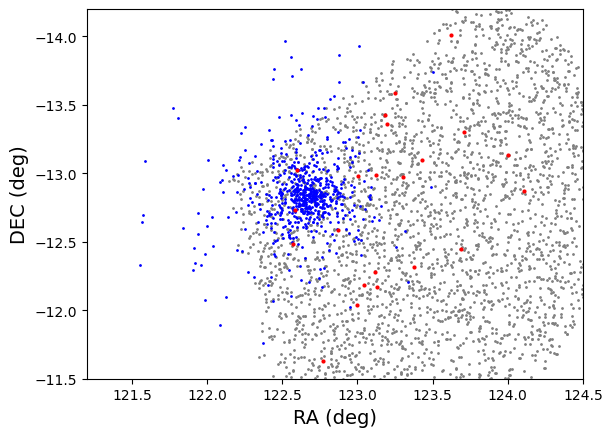

In [60]:
fig, ax = plt.subplots()

ax.scatter(p5.RAJ2000, p5.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p5.iloc[matched_idx_catalog1].RAJ2000, p5.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [61]:
dfvg_t = len(dfvg)
p5_t = len(p5.iloc[matched_idx_catalog1])

Completeness


In [62]:
p5_c = p5_t /dfvg_t
p5_c*100

3.3587786259541987

Pureness

In [63]:
p5_p = p5_t/len(p5)
p5_p*100

0.6842923794712287

## Analyzing

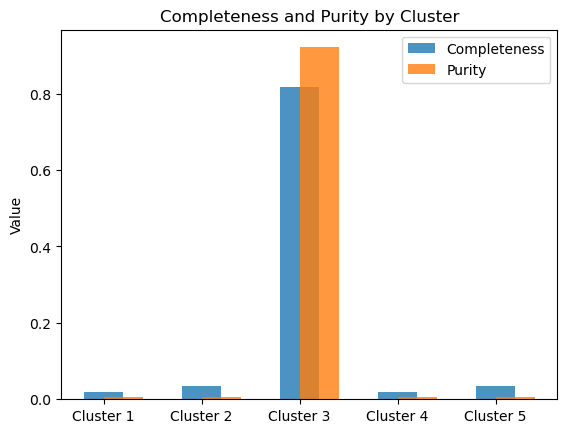

In [64]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3, 4, 5]
completeness = [p1_c, p2_c, p3_c, p4_c, p5_c]  # Exemplo de completude
purity = [p1_p, p2_p, p3_p, p4_p, p5_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("Completeness and Purity by Cluster")
plt.legend()
plt.show()